In [158]:
import aifc

In [71]:
file_name = 'flute.aiff'
file = aifc.open(file_name)

In [72]:
file.getcompname()

b'not compressed'

In [74]:
def metadata(aiff_file):
    metadata = {
        '            channels ' : aiff_file.getnchannels(),
        ' sample depth (bits) ' : 8*aiff_file.getsampwidth(),
        '  samples per second ' : aiff_file.getframerate(),
        ' length (in samples) ' : aiff_file.getnframes()
    }
    return metadata

In [75]:
for key, value in metadata(file).items():
    print(f'{key}| {value}')

            channels | 1
 sample depth (bits) | 16
  samples per second | 44100
 length (in samples) | 133120


In [84]:
import numpy as np

data = file.readframes(10000)
sig = np.frombuffer(data, dtype='>u2')

In [79]:
print(sig.shape)
sig2 = sig.copy()
sig2[:,0] = sig2[:,0].astype('i1')

(10000, 1)


In [85]:
data

b'\x04\xd3\xfb\xf0\xf5_\xf3\xbd\xef\x11\xeeQ\xf0P\xf7\x8e\xfe\x12\x006\x02\xa4\x02\xd0\x02\x1e\x06\x94\n\xa5\r\x7f\x0f8\x0f\xa3\x0c\xd2\x07\x9c\x01.\xf9g\xf3!\xf0k\xed\t\xefX\xf3\x99\xfa\x11\xfd\xbd\x00\xd2\x03+\x01\xdf\x04\x96\x08L\x0b\xfb\r\xb2\x0e\xef\x0el\n\x11\x02\x94\xfc2\xf6l\xf0\xee\xedZ\xef"\xf2\xaa\xf7s\xfe\xcf\x01\xab\x05\x13\x04\x8a\x03\xda\x07\xf5\x0b\x10\x0e-\x0e(\x0c\xf1\x0c1\x06.\xfd\xaf\xf8\x13\xf1\xeb\xef\xb7\xefh\xee\x94\xf4\xa8\xfc\xf0\xff\xa3\x02s\x04\x01\x04\xe8\x05\x9c\x08J\x0ch\x0f\x04\x0e\x9c\x0c\xf0\t\x9c\x03W\xfb$\xf6\x05\xf1\x1c\xee\xa3\xee\xdd\xf2U\xf8\x10\xfd\n\x01{\x03N\x02Y\x02\xfa\x07\x89\n\xb5\x0b\xbb\r\x8d\x0e \x0b\xe0\x06G\x00A\xf8\xed\xf4G\xf0M\xee\xd5\xf02\xf5\x1b\xfb\x97\xff#\x01L\x01l\x024\x03\x16\x06\x9e\n\xb9\r\xc9\r\xf5\ri\nN\x03\xf0\xfb\xf7\xf4\xba\xf1\xc1\xeer\xef:\xf3M\xfal\xfe\xd1\x02\x12\x04\x9e\x04\x8c\x05\x17\x07,\x0b0\r\xa3\x0c\xf2\x0c\xdb\tm\x03\x86\xfcp\xf5\xe2\xf3g\xef\xbe\xeeh\xf0U\xf6\xf9\xfb\xeb\x00P\x03\x04\x04P\x03z\x07\x06\t\x

In [86]:
sig[:100]

array([ 1235, 64496, 62815, 62397, 61201, 61009, 61520, 63374, 65042,
          54,   676,   720,   542,  1684,  2725,  3455,  3896,  4003,
        3282,  1948,   302, 63847, 62241, 61547, 60681, 61272, 62361,
       64017, 64957,   210,   811,   479,  1174,  2124,  3067,  3506,
        3823,  3692,  2577,   660, 64562, 63084, 61678, 60762, 61218,
       62122, 63347, 65231,   427,  1299,  1162,   986,  2037,  2832,
        3629,  3624,  3313,  3121,  1582, 64943, 63507, 61931, 61367,
       61288, 61076, 62632, 64752, 65443,   627,  1025,  1256,  1436,
        2122,  3176,  3844,  3740,  3312,  2460,   855, 64292, 62981,
       61724, 61091, 61149, 62037, 63504, 64778,   379,   846,   601,
         762,  1929,  2741,  3003,  3469,  3616,  3040,  1607,    65,
       63725], dtype=uint16)

In [334]:
left = (256**2)*(sig[:,2].astype('uint32')) + (256*(sig[:,1].astype('uint32'))) + (sig[:,0].astype('uint32'))
right = (256**2)*(sig[:,5].astype('uint32')) + (256*(sig2[:,4].astype('uint32'))) + (sig[:,3].astype('uint32'))

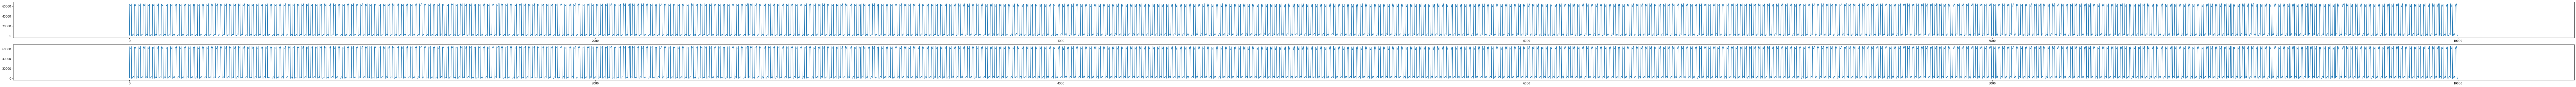

In [88]:
fig, axes = plt.subplots(2,1,figsize=(160,5))

x = list(range(sig.shape[0]))
##y1 = [y for y in left]
##y2 = [y for y in right]

axes[0].plot(x, sig)
axes[1].plot(x, sig)

[0, 59, 6, 0, 59, 6, 0, 53, 138, 0]


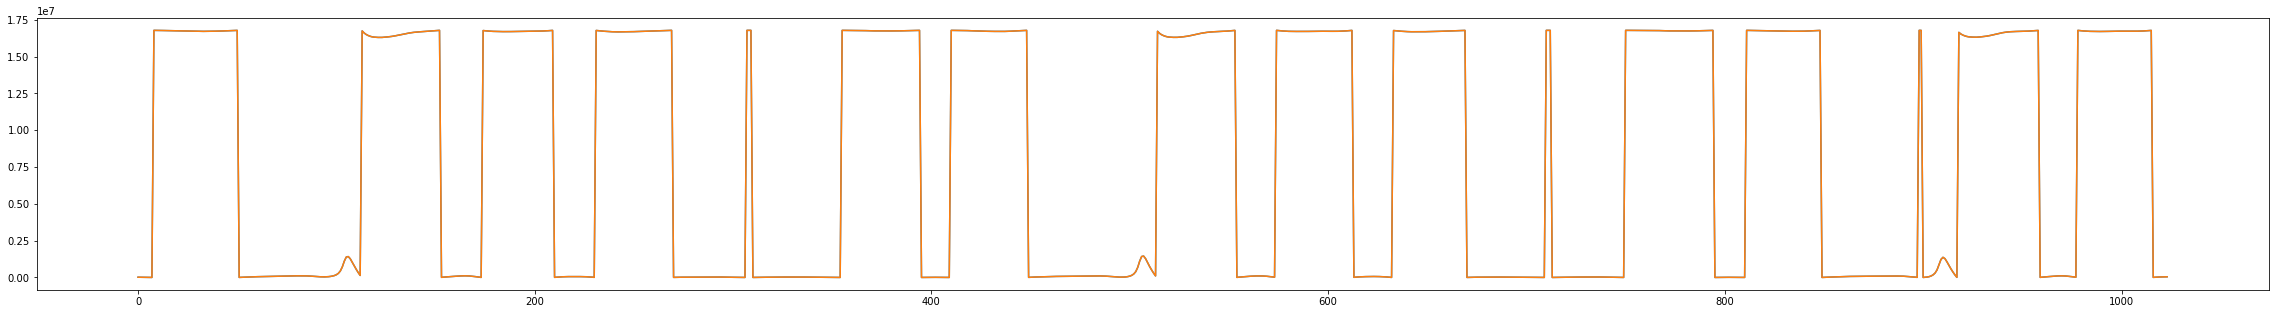

In [166]:
data = file.readframes(1024)
#print(data)
def parse(sample):
    left = (256**2)*sample[0] + 256*sample[1] + sample[2]
    right = (256**2)*sample[3] + 256*sample[4] + sample[5]
    return (left, right)
data[:10]
print(list(data)[:10])
samples = list((zip(list(data)[0::6],list(data)[1::6],list(data)[2::6],list(data)[3::6],list(data)[4::6],list(data)[5::6])))
#print(samples)
data2 = list(map(parse, samples))
#print(data2)

#print(data)
#def funct(string):
#    return string.replace('\\\\', '\\')
#                          
#thing = list(map(funct, str(data).split('\\x')[1:]))
#thing
x = list(range(0,1024))
y1 = list(map(lambda x: x[0], data2))
y2 = list(map(lambda x: x[1], data2))

fig, ax = plt.subplots(figsize=(40,5))

ax.plot(x, y1)
ax.plot(x, y2)

In [67]:
data2 = str(data)
data2.split("\\x")

["b'",
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 '00',
 '00V',
 '00',
 '00V',
 'ff',
 'ff',
 'dd',
 'ff',
 'ff',
 'dd',
 '00',
 '00U',
 '00',
 '00U',
 '00',
 '00T',
 '00',
 '00T',
 'ff',
 'ff',
 'dc',
 'ff',
 'ff',
 'dc',
 'ff',
 'ff',
 'dc',
 'ff',
 'ff',
 'dc',
 'ff',
 'ff',
 'dc',
 'ff',
 'ff',
 'dc',
 '00',
 '00S',
 '00',
 '00S',
 'ff',
 'ff',
 'dc',
 'ff',
 'ff',
 'dc',
 'ff',
 'ff',
 'db',
 'ff',
 'ff',
 'db',
 'ff',
 'ff',
 'dc',
 'ff',
 'ff',
 'dc',
 'ff',
 'ff',
 'dc',
 'ff',
 'ff',
 'dc',
 'ff',
 'ff',
 'dd',
 'ff',
 'ff',
 'dd',
 'ff',
 'fff',
 'ff',
 'fff',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'df',
 'ff',
 'ff',
 'df',
 '00',
 '00U',
 '00',
 '00U',
 '00',
 '00U',
 '00',
 '00U',
 'ff',
 'ff',
 'dd',
 'ff',
 'ff',
 'dd',
 'ff',
 'ff',
 'dc',
 'ff',

In [ ]:
data2 = np.fromstring(data, numpy.uint32)

In [139]:
import pandas as pd

In [140]:
import matplotlib.pyplot as plt

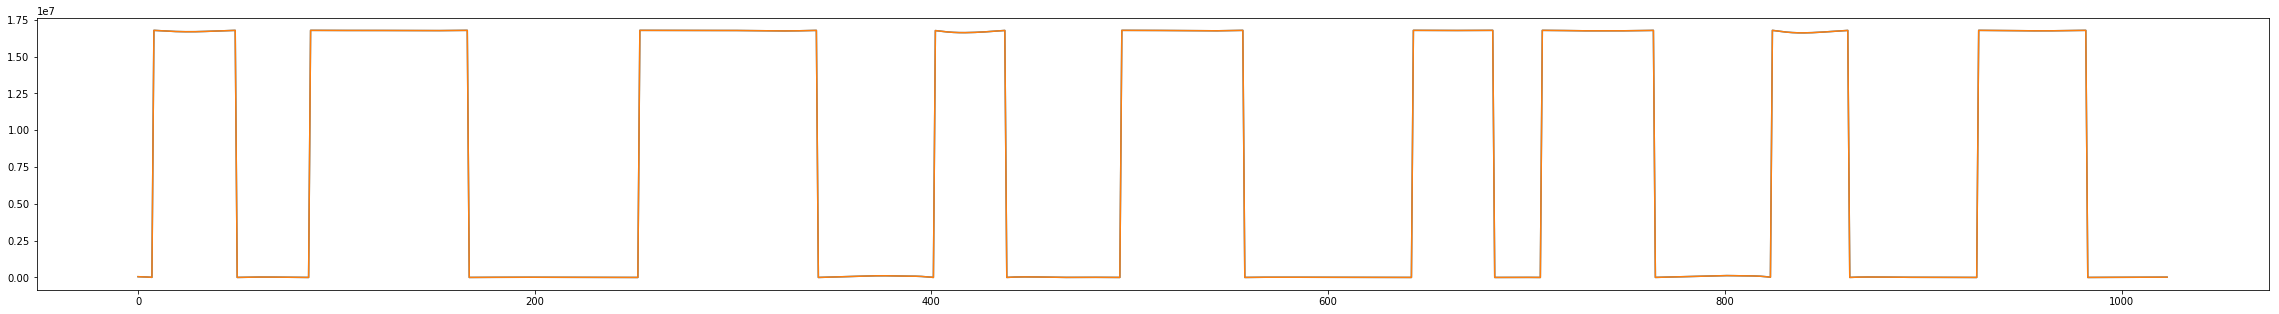

In [141]:
fig, ax = plt.subplots(figsize=(40,5))

ax.plot(x, y1)
ax.plot(x, y2)

In [342]:
!pip install audioread

In [ ]:
with audioread.audio_open(filename) as f:
    print(f.channels, f.samplerate, f.duration)
    for buf in f:
        do_something(buf)

In [89]:
import audioread

f = audioread.audio_open('flute.aiff')

In [90]:
print(f.channels, f.samplerate, f.duration)

1 44100 3.01859410430839


In [91]:
type(f)

audioread.rawread.RawAudioFile

In [92]:
result = []

for buf in f:
    result.append(list(buf))
    

In [93]:
result_joined = [value for sublist in result for value in sublist]

In [61]:
left_channel= 256*np.array(result_joined[0::4]) + np.array(result_joined[1::4])
right_channel= 256*np.array(result_joined[2::4]) + np.array(result_joined[3::4])

In [67]:
np.any(right_channel-left_channel)

False

In [98]:
result2 = np.array(result_joined[0::2]) + 256*np.array(result_joined[1::2])

In [45]:
result2 = {}
for i in range(len(result)):
    result2[i] = (np.array[result[i][0::2], result[i][1::2])

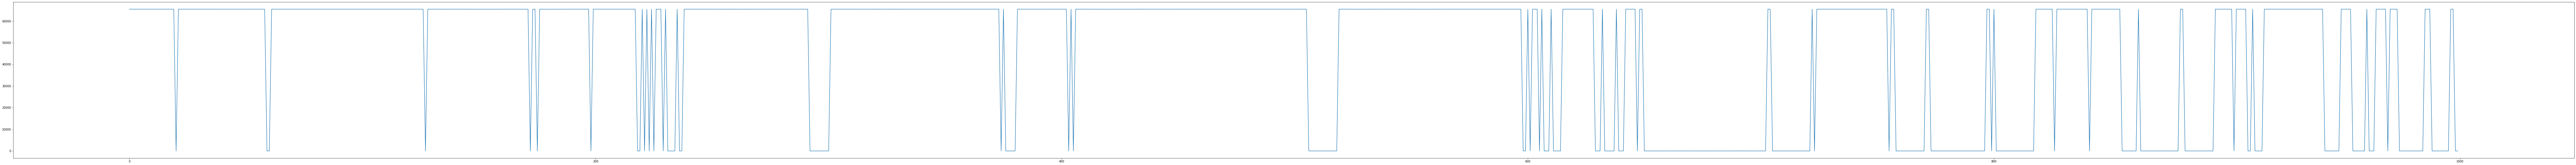

In [99]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(160,10))

y = result2[:1000]
x = list(range(len(y)))


ax.plot(x, y)

In [47]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,1,figsize=(160,10))

x = list(range(2048))
y1 = result2[0]
y2 = result2[1]

axes[0].plot(x, y1)
axes[1].plot(x, y2)

ValueError: x and y must have same first dimension, but have shapes (2048,) and (2, 2048)

In [101]:
!pip install librosa

In [2]:
import librosa.core as lrc
import librosa.display as lrd

In [104]:
series = lrc.load('flute.aiff')

In [125]:
snippet = series[0][0:1000]

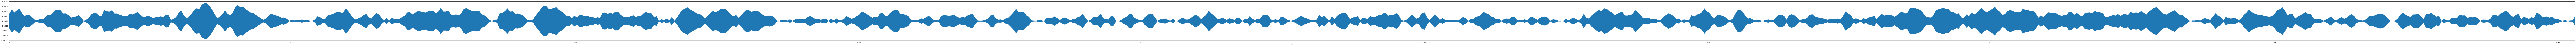

In [127]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(320,5))

lrd.waveplot(snippet, ax=ax)

ax.s

In [4]:
y, sr = lrc.load('flute.aiff')
pitches, magnitudes = lrc.piptrack(y=y, sr=sr)

In [12]:
y

array([-0.00035738, -0.0005909 , -0.0004327 , ..., -0.00026624,
       -0.00024998, -0.00021721], dtype=float32)

In [36]:
y.shape

(66560,)

In [26]:
import pandas as pd
import numpy as np

df = pd.DataFrame(pitches)
df

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


RangeIndex(start=0, stop=131, step=1)

In [37]:
(130*1024)/2

66560.0

In [34]:
df.iloc[2]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
126    0.0
127    0.0
128    0.0
129    0.0
130    0.0
Name: 2, Length: 131, dtype: float32

In [38]:
import matplotlib.pyplot as plt

In [152]:
zero = np.array([0,0,0])
X = np.array([5.5,4.5,7.5])
Y = np.array([70,62,72])
mX = np.sum(X)/3
mY = np.sum(Y)/3
X_adj = (X-mX)/(2**0.5)
Y_adj = (Y-mY)/(2**0.5)

X1 = list(zip(zero,X))
Y1 = list(zip(zero,Y))
X2 = list(zip(zero,X_adj))
Y2 = list(zip(zero,Y_adj))
Z = np.array(['Person 1', 'Person 2', 'Person 3'])
df = pd.DataFrame([Z,X,Y])

In [153]:
df2 = df.T
df2.columns = ['Observation', 'Height (feet)', 'Weight (kilograms)']
df2.set_index('Observation')

,Height (feet),Weight (kilograms)
Observation,,
Person 1,5.5,70
Person 2,4.5,62
Person 3,7.5,72


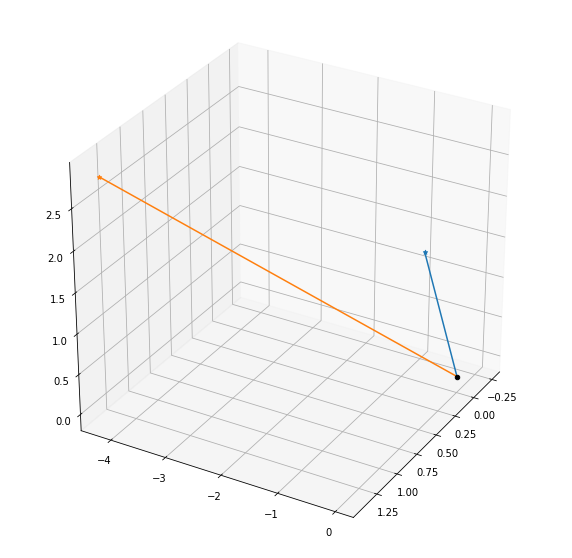

In [154]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(*X2)
ax.plot(*Y2)
ax.scatter(0, 0, 0, color='black')
ax.scatter(*X_adj, marker='*')
ax.scatter(*Y_adj, marker='*')
ax.view_init(30, 30)

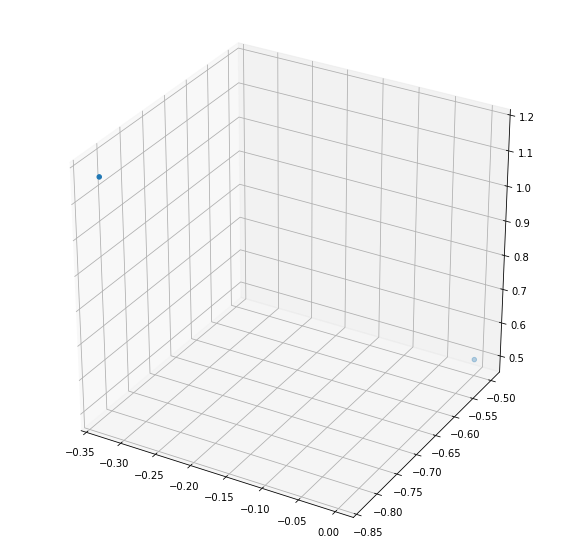

In [128]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(coords_adj[0], coords_adj[1], coords_adj[2])

Text(0, 0.5, 'Weight (kilograms)')

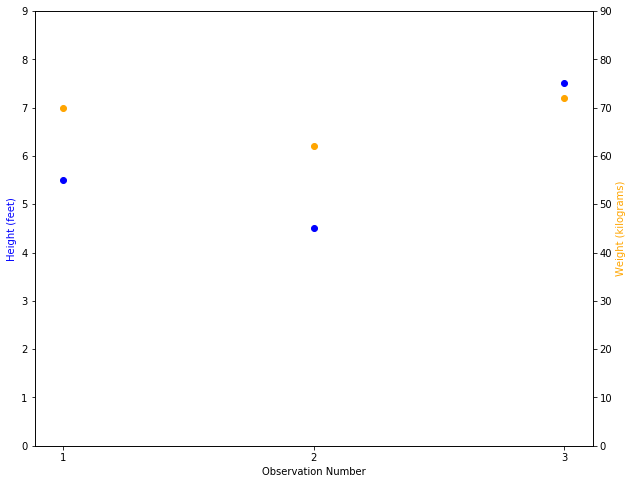

In [129]:
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter([1,2,3], X, color='blue')
ax2 = ax.twinx()
ax2.scatter([1,2,3], Y, color='orange')
ax.set_xticks([1,2,3])
ax.set_yticks([0,1,2,3,4,5,6,7,8,9])
ax2.set_yticks([0,10,20,30,40,50,60,70,80,90])
ax.set_xlabel('Observation Number')
ax.set_ylabel('Height (feet)', color='blue')
ax2.set_ylabel('Weight (kilograms)', color='orange')

Text(0.5, 1.0, '')

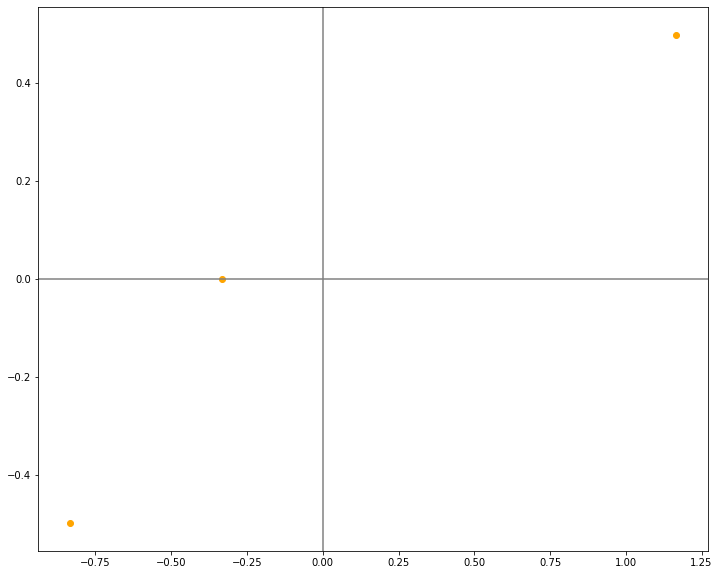

In [70]:
fig, ax = plt.subplots(figsize=(12,10))

ax.scatter(X_adj, Y_adj, color='orange')
ax.axhline(color='grey')
ax.axvline(color='grey')
ax.set_title('')

In [215]:
y, sr = lrc.load('Violin/Violin.arco.ff.sulG.Bb3.stereo.aif', sr=None)

In [216]:
sr

44100

In [217]:
y.shape

(90862,)

In [219]:
harm = librosa.effects.harmonic(y)

In [228]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

In [237]:
chroma

array([[0.22742935, 0.08654717, 1.        , ..., 1.        , 0.36786568,
        0.5825561 ],
       [0.26890376, 0.35410243, 0.6978518 , ..., 0.85010374, 0.4833664 ,
        0.5110522 ],
       [0.19966109, 1.        , 0.3766527 , ..., 0.7127689 , 0.56271267,
        0.4480361 ],
       ...,
       [0.6524168 , 0.04194051, 0.58203983, ..., 0.9391463 , 0.40571293,
        0.53256595],
       [0.30453753, 0.0523738 , 0.7781826 , ..., 0.98467463, 0.35647678,
        0.54801726],
       [0.259144  , 0.07143728, 0.9857053 , ..., 0.9982575 , 0.3096216 ,
        0.5410008 ]], dtype=float32)

In [236]:
chroma.mean(axis=1)

array([0.21509057, 0.09415784, 0.11517598, 0.04307461, 0.04192203,
       0.07893196, 0.06289211, 0.07993304, 0.15825756, 0.43581048,
       0.97563   , 0.57383823], dtype=float32)

In [254]:
n_fft = 4096 # number of samples in half a period of the lowest frequency to detect
stft = librosa.stft(y, n_fft = 4096) # Short Time Fourier Transform 

In [255]:
stft.shape

(2049, 89)

In [298]:
freqs2 = librosa.core.fft_frequencies(sr=sr, n_fft=n_fft)
sorted(list(zip(freqs2, np.abs(stft).mean(axis=1))), key=lambda x: x[1], reverse=True)


[(462.9638671875, 103.58994),
 (452.197265625, 65.578606),
 (473.73046875, 42.34644),
 (1152.0263671875, 30.352695),
 (226.0986328125, 29.3549),
 (236.865234375, 26.12395),
 (2077.9541015625, 25.413086),
 (1162.79296875, 20.265965),
 (2067.1875, 17.770372),
 (2088.720703125, 15.049452),
 (3682.177734375, 13.54449),
 (925.927734375, 13.3649235),
 (1141.259765625, 13.110418),
 (689.0625, 13.107788),
 (3692.9443359375, 11.248706),
 (1388.8916015625, 10.893977),
 (699.8291015625, 10.206686),
 (915.1611328125, 9.732778),
 (1378.125, 9.729391),
 (1614.990234375, 8.847946),
 (215.33203125, 7.3860645),
 (3703.7109375, 7.263118),
 (3229.98046875, 6.968132),
 (3671.4111328125, 6.8154826),
 (1625.7568359375, 6.3569794),
 (3219.2138671875, 5.9232774),
 (441.4306640625, 5.7451634),
 (3240.7470703125, 5.2061734),
 (936.6943359375, 5.0577874),
 (2056.4208984375, 4.8613114),
 (2304.052734375, 4.7223954),
 (247.6318359375, 4.4443536),
 (678.2958984375, 4.394383),
 (3919.04296875, 4.2919254),
 (2314.819

In [294]:
sorted(list(zip(freqs, np.abs(stft).mean(axis=1))), key=lambda x: x[1], reverse=True)

[(236.865234375, 103.58994),
 (231.48193359375, 65.578606),
 (242.24853515625, 42.34644),
 (581.396484375, 30.352695),
 (118.4326171875, 29.3549),
 (123.81591796875, 26.12395),
 (1044.3603515625, 25.413086),
 (586.77978515625, 20.265965),
 (1038.97705078125, 17.770372),
 (1049.74365234375, 15.049452),
 (1846.47216796875, 13.54449),
 (468.34716796875, 13.3649235),
 (576.01318359375, 13.110418),
 (349.91455078125, 13.107788),
 (1851.85546875, 11.248706),
 (699.8291015625, 10.893977),
 (355.2978515625, 10.206686),
 (462.9638671875, 9.732778),
 (694.44580078125, 9.729391),
 (812.87841796875, 8.847946),
 (113.04931640625, 7.3860645),
 (1857.23876953125, 7.263118),
 (1620.37353515625, 6.968132),
 (1841.0888671875, 6.8154826),
 (818.26171875, 6.3569794),
 (1614.990234375, 5.9232774),
 (226.0986328125, 5.7451634),
 (1625.7568359375, 5.2061734),
 (473.73046875, 5.0577874),
 (1033.59375, 4.8613114),
 (1157.40966796875, 4.7223954),
 (129.19921875, 4.4443536),
 (344.53125, 4.394383),
 (1964.904785

In [295]:
len(freqs)

2049

In [317]:
sr

44100

In [ ]:
n_fft / sr # amount of time each frame takes up = 1/2 period of lowest freq
2*n_fft / sr # period of lowest frequency
1 / (2*n_fft / sr) # sin(2*pi*c*t), sin(c*t) = sin(c*(t+ 2*n_fft / sr)) ==> c*(2*n_fft/sr)= 2*pi ==> c*(n_fft/sr)=pi

c = pi*s/n_fft

sin(2*pi*s / 2n_fft * t)

22050.0

In [310]:
stft[1:].shape

(2048, 89)

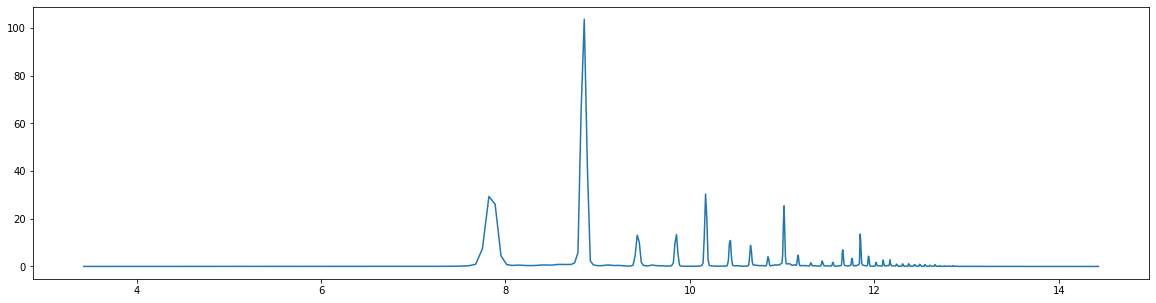

In [315]:
from math import log

n_fft = 4096 # number of samples in half a period of the lowest frequency to detect
stft = librosa.stft(y, n_fft = 4096)[1:] # Short Time Fourier Transform 

fig, ax = plt.subplots(figsize=(20,5))
#freqs = [(sr / (2*n_fft))*k for k in range(1, 2 + (n_fft//2))]
freqs = librosa.core.fft_frequencies(sr=sr, n_fft=n_fft)[1:]
log_2_freqs = list(map(lambda x: log(x, 2), freqs))
#print(log_2_freqs)
sorted(list(zip(log_2_freqs, np.abs(stft).mean(axis=1))), key=lambda x: x[1], reverse=True)

ax.plot(log_2_freqs, np.abs(stft).mean(axis=1))

# plt.hist(stft.mean(axis=1).shape)

In [296]:
max(freqs)

11030.38330078125

In [297]:
min(freqs)

5.38330078125

In [ ]:
lambda(x)

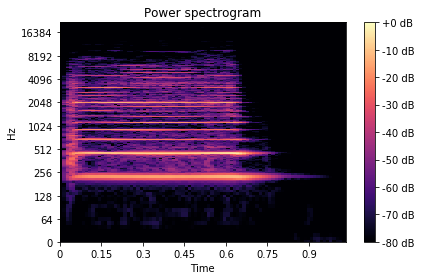

In [252]:
import matplotlib.pyplot as plt
librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), y_axis='log', x_axis='time', sr=sr)
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

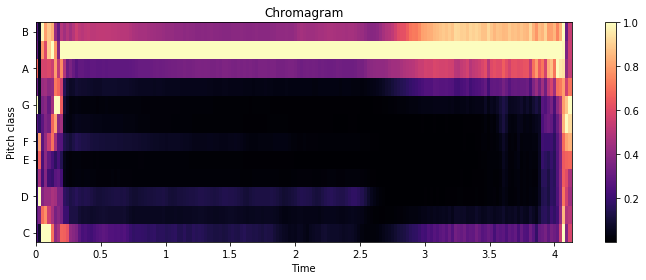

In [229]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

(array([  400.,  2288.,  8237.,  9070., 42375., 10571.,  8714.,  5882.,
         2765.,   560.]),
 array([-0.36936498, -0.29410955, -0.21885414, -0.14359874, -0.06834332,
         0.0069121 ,  0.08216751,  0.15742293,  0.23267834,  0.30793375,
         0.38318917], dtype=float32),
 <a list of 10 Patch objects>)

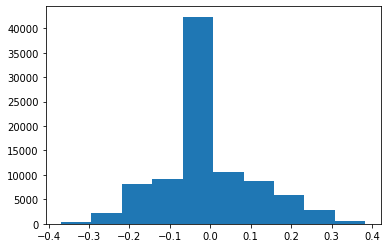

In [226]:
plt.hist(harm)

In [206]:
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

In [208]:
pitches.shape

(1025, 178)

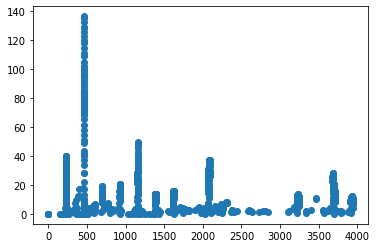

In [214]:
plt.scatter(pitches, magnitudes)

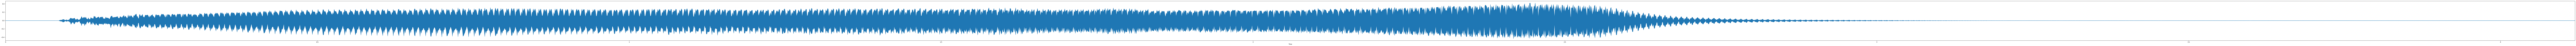

In [188]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(320,5))

lrd.waveplot(y, ax=ax)


In [170]:
!pip install sounddevice

In [197]:
import sounddevice as sd
sd.play(y.T, 1.0*sr)

In [166]:
type(y)

numpy.ndarray

(1025, 178)


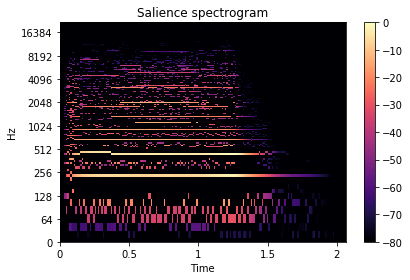

In [205]:
import librosa

S = np.abs(librosa.stft(y))
freqs = librosa.core.fft_frequencies(sr)
harms = [1, 2, 3, 4]
weights = [1.0, 0.5, 0.33, 0.25]
S_sal = librosa.salience(S, freqs, harms, weights, fill_value=0)
print(S_sal.shape)
import matplotlib.pyplot as plt
plt.figure()
librosa.display.specshow(librosa.amplitude_to_db(S_sal, ref=np.max), sr=sr, y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Salience spectrogram')
plt.tight_layout()
plt.show()